In [1]:
# Appeding the path to the scaman package
import sys
sys.path.append('/Users/berke/Codes/scaman/scaman')

In [2]:
import numpy as np

A = np.arange(1,26).reshape(5,5)
A

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [3]:
## Create LLE object
from serial.lle import LLE
lle = LLE(n_components=3, n_neighbors=2, solver='numpy')
embedding = lle.fit_transform(A)

Weights Shape:
 (5, 5)


In [4]:
# Print the output of each module in the LLE class
neighbors, indices, distances =lle._find_neighbors(A)
print("Pairwise Distances:\n", distances)


Pairwise Distances:
 [[ 0.         11.18033989 22.36067977]
 [ 0.         11.18033989 11.18033989]
 [ 0.         11.18033989 11.18033989]
 [ 0.         11.18033989 11.18033989]
 [ 0.         11.18033989 22.36067977]]


In [5]:
# Find nearest neighbors
print("Nearest Neighbors:\n", neighbors)

Nearest Neighbors:
 [[1 2]
 [2 0]
 [3 1]
 [4 2]
 [3 2]]


In [6]:
# Compute weights
print("Weights:\n", lle._compute_weights(neighbors))

Weights Shape:
 (5, 5)
Weights:
 [[ 0.        1.999976 -0.999976  0.        0.      ]
 [ 0.5       0.        0.5       0.        0.      ]
 [ 0.        0.5       0.        0.5       0.      ]
 [ 0.        0.        0.5       0.        0.5     ]
 [ 0.        0.       -0.999976  1.999976  0.      ]]


In [7]:
# Make sure weights matrix's rows sum to 1
print("Row Sum of Weights:\n", np.sum(lle._compute_weights(neighbors), axis=1))

Weights Shape:
 (5, 5)
Row Sum of Weights:
 [1. 1. 1. 1. 1.]


In [8]:
# Compute embedding with eigendeomposition
print("Embedding:\n", embedding)

Embedding:
 [[-4.47238517e-01  6.32436695e-01 -4.94817359e-01]
 [-4.47226056e-01  3.16212572e-01  1.54829386e-01]
 [-4.47213595e-01 -1.76221947e-05  6.79975945e-01]
 [-4.47201134e-01 -3.16247817e-01  1.54829386e-01]
 [-4.47188674e-01 -6.32471939e-01 -4.94817359e-01]]


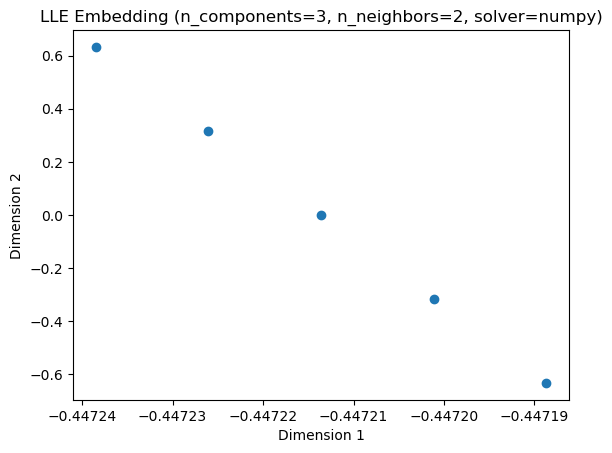

In [9]:
# Plot Embedding
lle.plot(embedding)